1026

# handling of event

- event
- event handler 활용

## Event

: 무언가 일어났다는 신호, 사건. 모든 DOM element는 이러한 event를 만들어냄

DOM 요소는 event를 받고 받은 event를 처리(event handler)할 수 있음


**event object** : DOM에서 이벤트 발생시 생성되는 객체

이벤트 종류 : mouse, input, keyboard, touch, ...

https://developer.mozilla.org/en-US/docs/Web/API/Event


## Event handler
: 이벤트가 발생했을 때 실행되는 함수
-> 사용자의 행동에 어떻게 반응할지를 JavaScript 코드로 표현한 것

### .addEventListener()

**.addEventListener()** 

: 특정 이벤트를 DOM요소가 수신할 때마다 콜백 함수를 호출

```
EventTarget.addEventListener(type, handler)
*EventTarget: DOM 요소 / type: 수신할 이벤트 / handler : 콜백함수                   
```

대상(eventTarget)에 특정event(type)가 발생하면 지정한이벤트를 받아 할 일(handler)을 등록함.

콜백함수(handler)는 유일한 매개변수로써, 첫 번째 인자로 event를 받는다.

모든 정보는 event 객체에 들어있음

* type

    : 수신할 이벤트 이름. 문자열로 작성("name")

* handle

    : 발생한 이벤트 객체를 수신하는 콜백 함수. 콜백 함수는 발생한 event object를 유일한 매개변수로 받음

**활용**

![Alt text](image-57.png)

![Alt text](image-58.png)

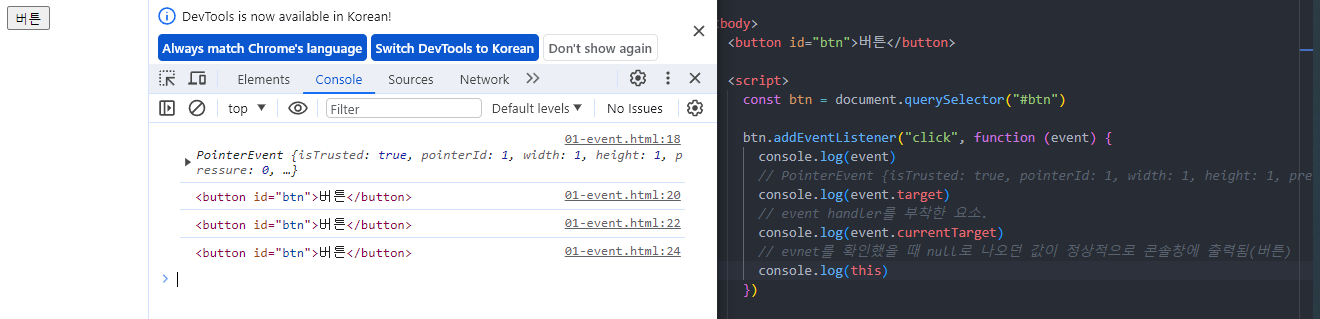

addEventListener는 강제로 본인의 앞의 객체를 가리키게 되어 있음.

주의! 화살표 함수로 작성하면 안됨 --> 화살표 함수는 자신만의 this를 가짐. 

addEvenetListener로 강제할 수 없어 화살표 함수로 작성 시 this는 window가 돰

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <button id="btn">버튼</button>

  <script>
    const btn = document.querySelector("#btn")

    btn.addEventListener("click", function (event) {
      console.log(event) 
      // PointerEvent {isTrusted: true, pointerId: 1, width: 1, height: 1, pressure: 0, …}
      console.log(event.target)
      // event handler를 부착한 요소.
      console.log(event.currentTarget)
      // evnet를 확인했을 때 null로 나오던 값이 정상적으로 콘솔창에 출력됨(버튼)
      console.log(this)
    })



  </script>
</body>

</html>


In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <button id="btn">버튼</button>

  <script>
    const btn = document.querySelector("#btn")

    const detectClick = function (event) {
      console.log(event)
      console.log(event.currentTarget)
      console.log(this)
    }

    btn.addEventListener("click", detectClick)
    
  </script>
</body>

</html>


### 버블링

핸들러는 form 요소에 할당되어 있으나 div나 p요소같은 중첩된 요소를 클릭해도 동작함 --> 왜?

**버블링**

    : 한 요소에 이벤트가 발생하면 이 요소에 할당된 핸들러가 동작하고, 이어서 부모 요소의 핸들러가 동작하는 현상

    가장 최상단의 조상 요소(document)를 만날 때까지 이 과정이 반복되며 요소 각각에 할당된 핸들러가 동작

    --> 이벤트가 제일 깊은 곳에 있는 요소에서 시작해 부모 요소를 거슬러 올라가며 발생하는 것이 마치 물 속 거품과 닮아 버블링이라 함

    버블링의 방향은 하위요소->상위요소로. document까지.


버블링 예시

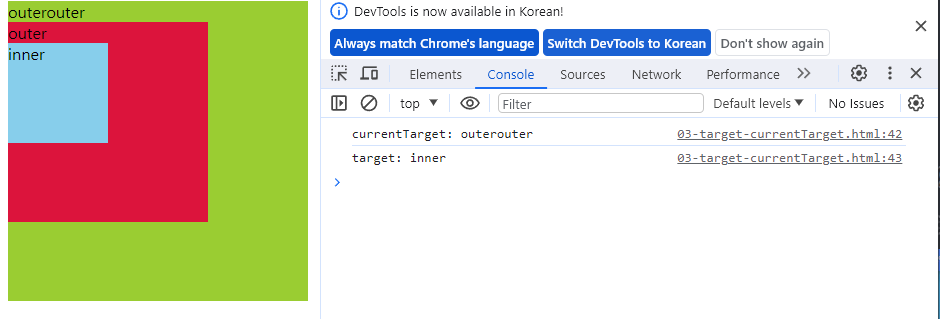

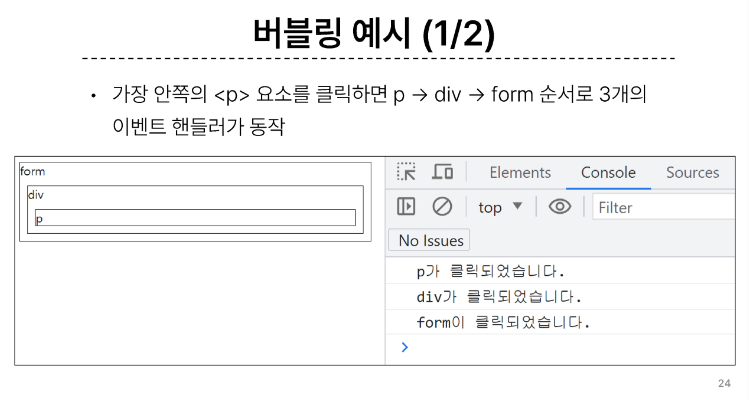

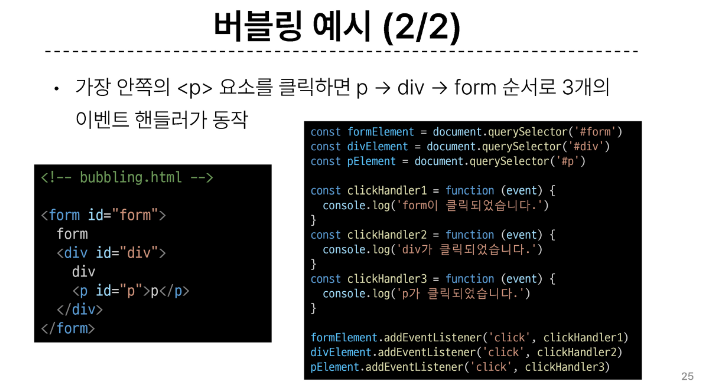

이벤트가 어디에서 발생했는지 알아보기

**"tartget" 속성과 "currentTarget" 속성**

+ "target" 속성

    - 이벤트가 발생한 가장 안쪽의 요소(target)를 참조하는 속성

    - 실제 이벤트가 시작된 target 요소

    - 버블링이 진행되어도 변하지 x

+ "currentTarget" 속성

    - "현재 요소". 항상 이벤트 핸들러가 연결된 요소만을 참조. =="this"와 같음

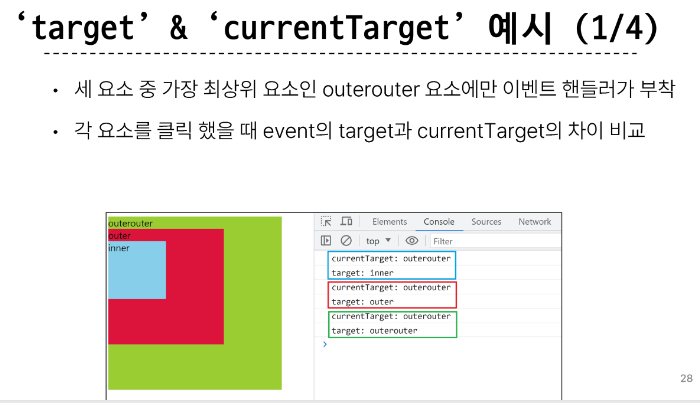

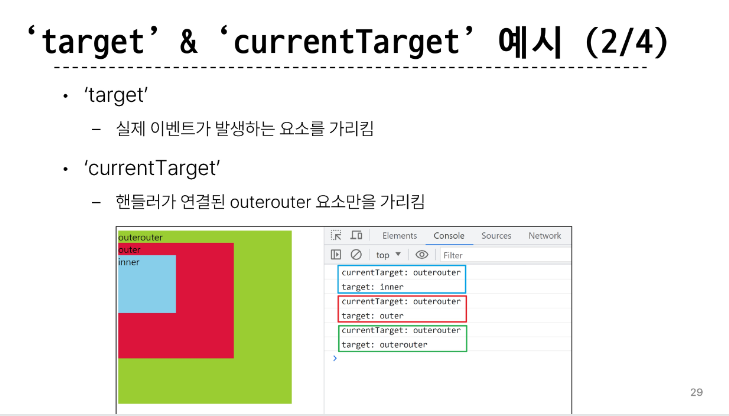

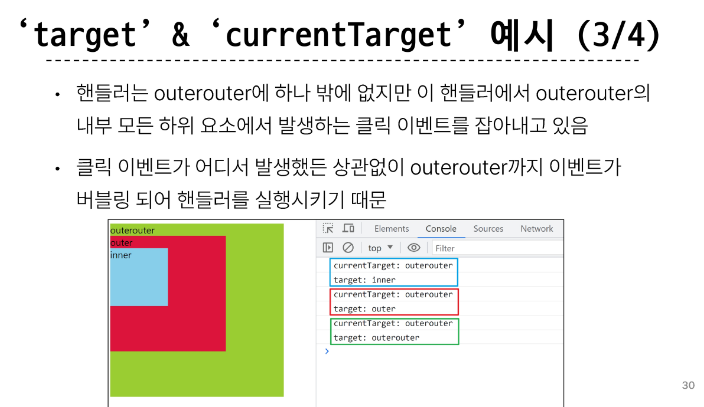

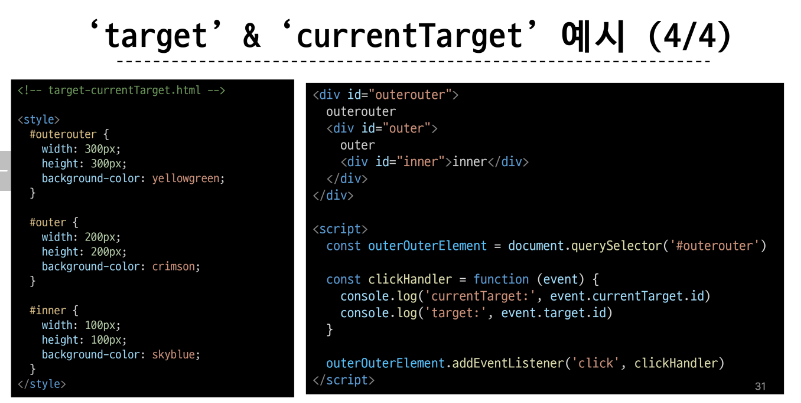


캡쳐링- 브라우저가 하는것

브라우저는 사용자가 어떤 하위요소를 클릭했는지 알 수 없음. 브라우저는 클릭된 곳의 최상위요소에서 실제 target까지 찾아내려감(이게 캡쳐링) 해서 쭉쭉 내려가서 target을 찾아내고, 여기서부터 버블링이 되어 올라감, 올라가다가 eventhandler를 실행하려 올라가는것.

캡처링으로 어디서 눌린건지 찾으러 내려감 -> 찾은 후 버블링으로 전파가 됨

--> 왜 이렇게 하는건가

--라이브 참고

예시. ul tag 안의 수많은 li.
각각의 eventListener가 개별적으로 모두 실행되었으면 좋겠다 할 때 하나하나의 eventListener를 부착할 것이 아니라 상위의 ul에만 부착.
실제 클릭되는 것은 target( ex ul 안의 하나의 li) 사용자가 li를 클릭했을 때 target을 찾으러 li까지 내려가고 실행되는 것은 ul(부모요소)를 만났을 때이다. target은 li, current target은 ul이 된다.

currentTarget을 출력하면 정상 출력되지만
event를 출력했을 때 currentTarget이 null인 이유
--> 버블링 되어 올라오는것 보다 console창 출력이 더 빨라서 그럼
대안으로 target의 속성을 보면됨

### event handler 실습

**currentTarget 주의사항**

console.log()로 event 객체를 출력할 경우

currentTarget 키의 값은 null을 가짐.

-->currentTarget은 이벤트가 처리될 동안에만 사용 가능하기 때문에

-->확인법: console.log(event.currentTarget)으로 콘솔에서 확인 가능.

currentTarget 이후 속성값들은 "target"참고해서 사용


In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
  <style>
    #outerouter {
      width: 300px;
      height: 300px;
      background-color: yellowgreen;
    }

    #outer {
      width: 200px;
      height: 200px;
      background-color: crimson;
    }

    #inner {
      width: 100px;
      height: 100px;
      background-color: skyblue;
    }
  </style>
</head>

<body>
  <div id="outerouter">
    outerouter
    <div id="outer">
      outer
      <div id="inner">inner</div>
    </div>
  </div>

  <script>
    const outerOuterElement = document.querySelector('#outerouter')

    const clickHandler = function (event) {
      console.log('currentTarget:', event.currentTarget.id)
      console.log('target:', event.target.id)
    }

    outerOuterElement.addEventListener('click', clickHandler)
  </script>
</body>

</html>


In [ ]:
<!-- click event -->
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <button id="btn">버튼</button>
  <p>클릭횟수 : <span id="counter">0</span></p>

  <script>
    // 1. 초기값 할당
    let counterNumber = 0

    // 2. 버튼 요소 선택
    const btn = document.querySelector('#btn')


    // 3. 콜백 함수 (버튼에 클릭 이벤트가 발생할때마다 실행할 코드)
    const clickHandler = function () {
      // 3.1 초기값 += 1
      counterNumber += 1

      // 3.2 p 요소를 선택
      const spanTag = document.querySelector('#counter')

      // 3.3 p 요소의 컨텐츠를 1 증가한 초기값으로 설정
      spanTag.textContent = counterNumber
    }

    // 4. 버튼에 이벤트 핸들러 부착 (클릭 이벤트)
    btn.addEventListener('click', clickHandler)
  </script>
</body>

</html>


In [ ]:
<!-- inputEvent -->

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <input type="text" id="text-input">
  <p></p>

  <script>
    // 1. input 요소 선택
    const inputTag = document.querySelector("#text-input")

    // 2. p 요소 선택
    const pTag = document.querySelector("p")

    // 3. 콜백 함수 (input 요소에 input 이벤트가 발생할때마다 실행할 코드)
    // 3.1 작성하는 데이터가 어디에 누적되고 있는지 찾기
    const inputHandler = function (event) {
      // console.log(event)
      // console.log(event.currentTarget)
      console.log(event.currentTarget.value)
      // console.log(this.value) event.currentTarget.value == this.value
      // 3.2 p요소의 컨텐츠에 작성하는 데이터를 추가
      pTag.textContent = event.currentTarget.value
    }

    inputTag.addEventListener("input", inputHandler)
</script>
</body>


</html>


In [ ]:
<!-- click + input event -->

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
  <style>
    .blue {
      color: blue;
    }
  </style>
</head>

<body>
  <h1></h1>
  <button id="btn">클릭</button>
  <input type="text" id="text-input">

  <script>
    // input 구현
    const inputTag = document.querySelector("#text-input")
    const h1Tag = document.querySelector("h1")

    const inputHandler = function (event) {
      h1Tag.textContent = event.currentTarget.value

    }

    inputTag.addEventListener("input", inputHandler)

    // click 구현

    const btn = document.querySelector("#btn")

    const clickHandler = function (event) {
      // console.log(event)
      // h1Tag.classList.add("blue")
    
      h1Tag.classList.toggle("blue")
    }

    btn.addEventListener("click", clickHandler)
  </script>
</body>

</html>


In [ ]:
<!-- todo  -->

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <input type="text" class="input-text">
  <button id="btn">+</button>
  <ul></ul>

  <script>
    // 1. 필요한 요소 선택
    const inputTag = document.querySelector(".input-text")
    const btnTag = document.querySelector("#btn")
    const ulTag = document.querySelector("ul")

    const addTodo = function (event) {
      // 2.1 사용자 입력 데이터 저장
      console.log(inputTag)
      const inputData = inputTag.value

      // 3. 사용자 입력데이터가 빈 데이터인지 확인
      if (inputData.trim()) {

        // 2.2 데이터를 저장할 li 요소를 생성
        const liTag = document.createElement("li")
      
        // 2.3 li 요소 컨텐츠에 데이터 입력
        liTag.textContent = inputData
        console.log(liTag)

        // 2.4 li 요소를 부모 ul 요소의 자식 요소로 추가
        ulTag.appendChild(liTag)

        // 2.5 todo 추가 후 input의 입력 데이터는 초기화
        inputTag.value = ""
      }
      else {
        window.alert("todo를 입력하세요")
      }
              
    }


    // 2. 버튼에 이벤트 핸들러를 부착
    btnTag.addEventListener("click", addTodo)


  </script>
</body>

</html>



**lodash**

- 모듈성, 성능 및 추가 기능을 제공하는 JS 유틸리티 라이브러리.

- array, object 등 자료구조를 다룰 때 사용하는 유용하고 간편한 함수 제공

- https://lodash.com/

https://lodash.com/docs/4.17.15

In [ ]:
<!-- lottery -->

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <h1>로또 추천 번호</h1>
  <button id="btn">행운 번호 받기</button>
  <div></div>

  <script src="https://cdn.jsdelivr.net/npm/lodash@4.17.21/lodash.min.js"></script>
  <script>
    // 1. 필요한 요소 선택
    const btnTag = document.querySelector("#btn")
    const divTag = document.querySelector("div")

    // 2. 로또 번호를 생성하는 함수 + tag만들고 출력까지 하는 (콜백함수)
    const getLottery = function (event) {
      // 2.1 1부터 45까지의 값이 필요
      const numbers = _.range(1, 46)
      // console.log(numbers)

      // 2.2 45개의 요소가 있는 배열에서 6개 번호 추출
      const sixNumbers = _.sampleSize(numbers, 6)
      // console.log(sixNumbers)

      // 2.5 6개의 li 요소를 담을 ul 요소 생성
      const ulTag = document.createElement("ul")

      // 2.3 추출한 번호 배열을 "반복"하면서 li 요소를 생성
      // 2.4 번호를 담을 li 요소 생성 후 입력
      sixNumbers.forEach(number => {
        const liTag = document.createElement("li")
        liTag.textContent = number
        // console.log(liTag)
        
        // 2.6 만들어진 li를 ul 요소에 추가
        ulTag.appendChild(liTag)
      });

      // 2.7 완성한 ul 요소를 div 요소에 추가
      divTag.appendChild(ulTag)
    }

    // 3. 버튼 요소에 이벤트 핸들러를 부착
    btnTag.addEventListener("click", getLottery)
  </script>
</body>

</html>


### event 기본 동작 취소

**.preventDefault()**

: 해당 이벤트에 대한 기본 동작을 실행하지 않도록 지정

버블링(전파)를 막는 건 아님.

이벤트 실행 target이 누군지 조건을 주지 막는경우는 잘 안 쓴다고 함

event.stopPropagation() 현재 target 요소 이후로는 이벤트 전달 막음

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <h1>중요한 내용</h1>

  <form id="my-form">
    <input type="text" name="username">
    <button type="submit">Submit</button>
  </form>

  <script>
    // 1
    const h1Tag = document.querySelector('h1')

    h1Tag.addEventListener('copy', function (event) {
      console.log(event)
      event.preventDefault()
      alert('복사 할 수 없습니다.')
    })

    // 2
    const formTag = document.querySelector('#my-form')

    const handleSubmit = function (event) {
      event.preventDefault()
    }

    formTag.addEventListener('submit', handleSubmit)

  </script>
</body>

</html>



+ addEventListener에서의 화살표 함수 주의사항

    : 화살표 함수는 자신만의 this를 가지지 않기 때문에 자신을 포함하고 있는 함수의 this를 상속받음
    그러니까 저기서 화살표 함수 쓰지 말아라.

    

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <button id="function">function</button>
  <button id="arrow">arrow function</button>

  <script>
    const functionButton = document.querySelector('#function')
    const arrowButton = document.querySelector('#arrow')

    functionButton.addEventListener('click', function () {
      console.log(this) // <button id="function">function</button>
    })

    arrowButton.addEventListener('click', () => {
      console.log(this) // window
    })
  </script>
</body>

</html>


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
    <style>
        .card {
            margin : 5px auto;
            padding : 5px;
            width : 400px;
            border: 2px solid black;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="card">
            <h1>ONE</h1>
            <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit. 
                Quisquam nam, pariatur eaque accusamus porro incidunt earum atque rem 
                doloremque dolorum illo, alias repudiandae nemo. Ut eaque harum dolores iure commodi.</p>
                <hr>
                <button class="remove-btn">X</button>
            </div>
        <div class="card">
            <h1>TWO</h1>
            <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit. 
                Quisquam nam, pariatur eaque accusamus porro incidunt earum atque rem 
                doloremque dolorum illo, alias repudiandae nemo. Ut eaque harum dolores iure commodi.</p>
                <hr>
                <button class="remove-btn">X</button>
            </div>
        <div class="card">
            <h1>THREE</h1>
            <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit. 
                Quisquam nam, pariatur eaque accusamus porro incidunt earum atque rem 
                doloremque dolorum illo, alias repudiandae nemo. Ut eaque harum dolores iure commodi.</p>
                <hr>
                <button class="remove-btn">X</button>
            </div>
    </div>

    <script>
        // 1. 모든 버튼에 이벤트 부착
        const buttons = document.querySelectorAll(".remove-btn")

        console.log(buttons)
        const remove = function (event) {
        const container = document.querySelector(".container")
        // event.target.parentElement --> 이경우 button의 부모요소
        // console.log(event.target.parentElement)
        container.removeChild(event.target.parentElement)
        // event와 target의 관계가 간단할때는 위의 방법 이용, 하지만 어려울경우 queryselector 이용

        }

        buttons.forEach((button) => {
            button.addEventListener("click", remove)
        })
    </script>
</body>
</html>